In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from scipy.spatial.distance import cosine

data_dir = '/content/drive/My Drive/celebs/data'
model_path = '/content/drive/My Drive/celebs/model.h5'

In [3]:
# Load the model
model = load_model(model_path)

In [4]:
# Get a list of folders in the main directory and create label mapping
folders = os.listdir(data_dir)
folders.sort()
label_map = {folder_name: i for i, folder_name in enumerate(folders)}

In [5]:
type(label_map)

dict

In [6]:
# Function to preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Function to compute cosine similarity
def compute_cosine_similarity(features1, features2):
    return cosine(features1.flatten(), features2.flatten())

# Function to extract features from an image
def extract_features(img_path):
    img_array = preprocess_image(img_path)
    return model.predict(img_array).flatten()

# Function to predict the most similar celebrity
def predict_most_similar_celebrity(img_path):
    input_features = extract_features(img_path)

    most_similar_celebrity = None
    min_distance = float('inf')

    # Iterate over each celebrity folder
    for celebrity_folder in os.listdir(data_dir):
        celebrity_image_path = os.path.join(data_dir, celebrity_folder, os.listdir(os.path.join(data_dir, celebrity_folder))[0])
        celebrity_features = extract_features(celebrity_image_path)

        # Compute cosine similarity between input features and celebrity features
        distance = compute_cosine_similarity(input_features, celebrity_features)

        # Update most similar celebrity if the distance is smaller
        if distance < min_distance:
            min_distance = distance
            most_similar_celebrity = celebrity_folder

    # Return the predicted label (folder name) and the path to the image of the predicted celebrity
    celebrity_image_path = os.path.join(data_dir, most_similar_celebrity, os.listdir(os.path.join(data_dir, most_similar_celebrity))[0])
    return most_similar_celebrity, celebrity_image_path


# image to test

In [20]:
img_path = '/content/drive/My Drive/celebs/yo2.jpeg'

1/1 [==============================] - 0s 249ms/step


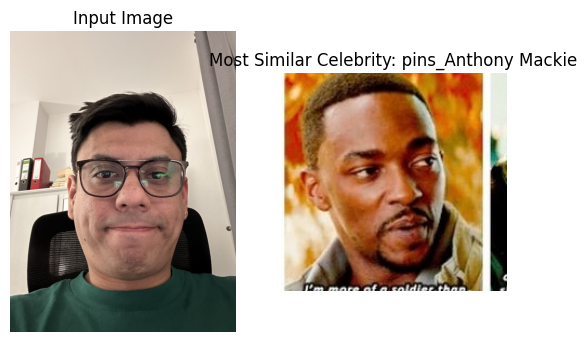

In [21]:
import numpy as np

# Function to compute Euclidean distance
def compute_euclidean_distance(features1, features2):
    return np.linalg.norm(features1 - features2)

# Function to predict the most similar celebrity using Euclidean distance
def predict_most_similar_celebrity_euclidean(img_path):
    input_features = extract_features(img_path)

    most_similar_celebrity = None
    min_distance = float('inf')

    # Iterate over each celebrity folder
    for celebrity_folder in os.listdir(data_dir):
        celebrity_image_path = os.path.join(data_dir, celebrity_folder, os.listdir(os.path.join(data_dir, celebrity_folder))[0])
        celebrity_features = extract_features(celebrity_image_path)

        # Compute Euclidean distance between input features and celebrity features
        distance = compute_euclidean_distance(input_features, celebrity_features)

        # Update most similar celebrity if the distance is smaller
        if distance < min_distance:
            min_distance = distance
            most_similar_celebrity = celebrity_folder

    # Return the predicted label (folder name) and the path to the image of the predicted celebrity
    celebrity_image_path = os.path.join(data_dir, most_similar_celebrity, os.listdir(os.path.join(data_dir, most_similar_celebrity))[0])
    return most_similar_celebrity, celebrity_image_path

# Predict the most similar celebrity using Euclidean distance
predicted_celebrity, celebrity_image_path = predict_most_similar_celebrity_euclidean(img_path)

# Load and display the input image
input_image = image.load_img(img_path)
plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title("Input Image")
plt.axis('off')

# Load and display the image of the predicted celebrity
celebrity_image = image.load_img(celebrity_image_path)
plt.subplot(1, 2, 2)
plt.imshow(celebrity_image)
plt.title("Most Similar Celebrity: " + predicted_celebrity)
plt.axis('off')


plt.show()
